In [ ]:
import matplotlib.pyplot as plt
import pickle

In [62]:
def plot_residual_connectivity(connectivity, method: str = "wpli"):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

    axs[0].imshow(
        connectivity["pre_during"], vmin=-0.2, vmax=0.2, cmap="tab20c"
    )
    axs[0].set_title(f"pre_during {method}")
    axs[0].set_ylabel("EEG")
    axs[0].set_xlabel("EEG")

    im = axs[1].imshow(
        connectivity["pre_post"], vmin=-0.2, vmax=0.2, cmap="tab20c"
    )
    axs[1].set_title(f"pre_post {method}")
    axs[1].set_xlabel("EEG")

    im = axs[2].imshow(
        connectivity["during_post"], vmin=-0.2, vmax=0.2, cmap="tab20c"
    )
    axs[2].set_title(f"during_post {method}")
    axs[2].set_xlabel("EEG")

    fig.colorbar(im, ax=axs.ravel())
    plt.show()
    
def plot_connectivity(connectivity, method: str = "wpli"):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

    axs[0].imshow(
        connectivity["pre"].get_data("dense")[:, :, 0], vmin=0, vmax=1, cmap="tab20c"
    )
    axs[0].set_title(f"Pre {method}")
    axs[0].set_ylabel("EEG")
    axs[0].set_xlabel("EEG")

    im = axs[1].imshow(
        connectivity["during"].get_data("dense")[:, :, 0], vmin=0, vmax=1, cmap="tab20c"
    )
    axs[1].set_title(f"Pre {method}")
    axs[1].set_xlabel("EEG")

    im = axs[2].imshow(
        connectivity["post"].get_data("dense")[:, :, 0], vmin=0, vmax=1, cmap="tab20c"
    )
    axs[2].set_title(f"Pre {method}")
    axs[2].set_xlabel("EEG")

    fig.colorbar(im, ax=axs.ravel())
    plt.show()

In [42]:
# read a pickle file
with open('/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/wpli_connectivity.pkl', 'rb') as f:
    connectivity = pickle.load(f)

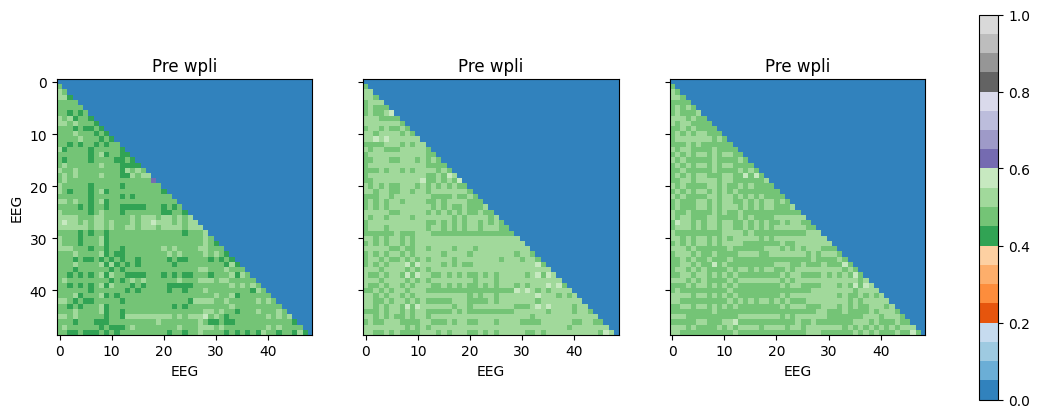

In [52]:
plot_connectivity(connectivity, method="wpli")

In [49]:
from itertools import combinations

residual_connectivity = {}
for stage1, stage2 in combinations(connectivity.keys(), 2):
    print(f"Comparing {stage1} and {stage2}")
    residual_connectivity[f"{stage1}_{stage2}"] = (connectivity[stage1].get_data("dense") - connectivity[stage2].get_data("dense")).squeeze()

Comparing pre and during
Comparing pre and post
Comparing during and post


In [59]:
for key, value in residual_connectivity.items():
    print(key, value.shape)
    print(f"{value.min()} - {value.max()}")

pre_during (49, 49)
-0.09453069032185019 - 0.08053956954708841
pre_post (49, 49)
-0.11220184013020434 - 0.08752032757865857
during_post (49, 49)
-0.05444472266931011 - 0.05040648946187798


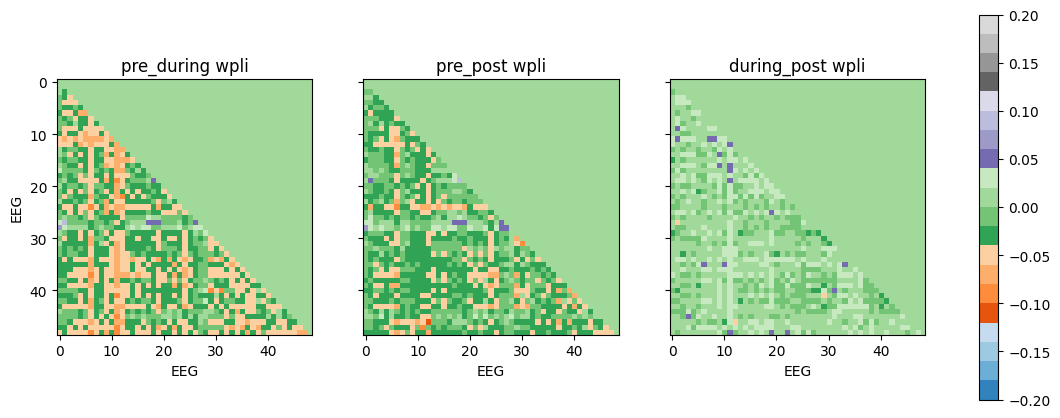

In [63]:
plot_residual_connectivity(residual_connectivity, method="wpli")

In [ ]:
import os.path as op

import matplotlib.pyplot as plt
import mne
import numpy as np
from mne import make_forward_solution, setup_source_space, setup_volume_source_space
from mne.datasets import sample
from mne.io import read_raw_fif
from mne.minimum_norm import apply_inverse_epochs, make_inverse_operator
from mne.viz import circular_layout

from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_connectivity_circle

import random
import pandas as pd

In [ ]:
def generate_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        r = round(random.random(), 3)
        g = round(random.random(), 3)
        b = round(random.random(), 3)
        a = 1.0  # Keeping alpha at 1.0 for full opacity
        colors.append((r, g, b, a))
    return colors

In [20]:
# read_metadata
metadata = pd.read_csv('/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/new_metadata.csv')
metadata.head()

label_names = eval(metadata.loc[0, "channels"])
node_order = label_names

# Second we need to define Node Angle
node_angles = circular_layout(
    label_names, node_order, start_pos=90, group_boundaries=[0, len(label_names) // 2]
)
node_colors = generate_colors(len(label_names))

In [30]:
def plot_circular_connectivity(connectivity, stage, node_angles, node_colors, method: str = "wpli", is_save: bool = False):
    fig, ax = plt.subplots(figsize=(8, 8), facecolor="black", subplot_kw=dict(polar=True))

    plot_connectivity_circle(
    connectivity.get_data("dense")[:, :, 0],
    label_names,
    n_lines=20,
    node_angles=node_angles,
    node_colors=node_colors,
    title=f"All-to-All Connectivity {stage} stimuli" f"Condition ({method})",
    ax=ax,
    )
    fig.tight_layout()
    
    if is_save:
        fig.savefig(f"{method}_{stage}.png", dpi=300)  

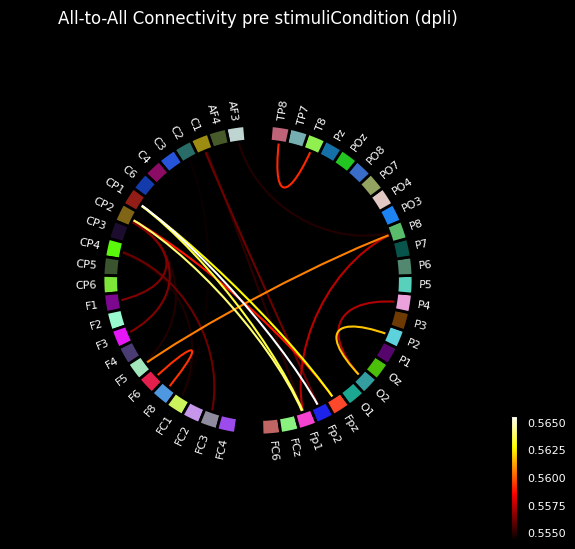

In [39]:
stage = "pre"
plot_circular_connectivity(connectivity[stage], stage, node_angles, node_colors, method="dpli", is_save=True)

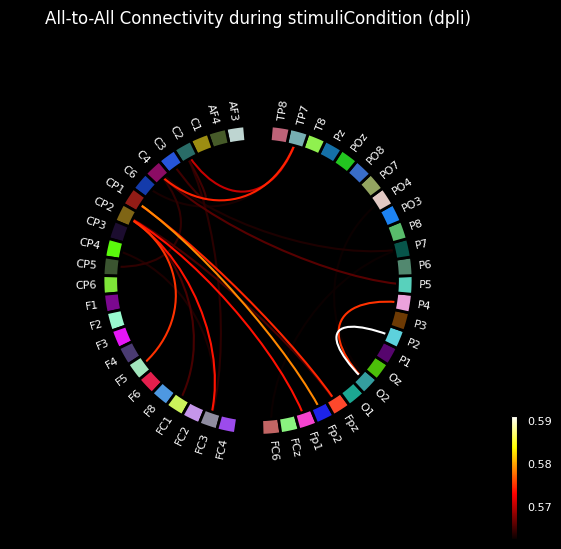

In [40]:
stage = "during"
plot_circular_connectivity(connectivity[stage], stage, node_angles, node_colors, method="dpli", is_save=True)

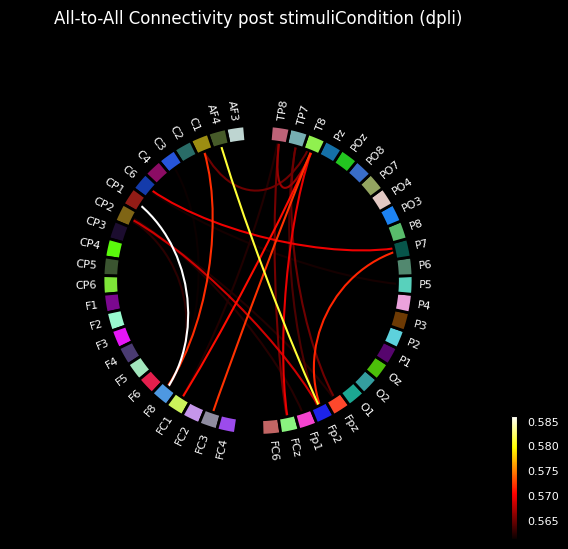

In [41]:
stage = "post"
plot_circular_connectivity(connectivity[stage], stage, node_angles, node_colors, method="dpli", is_save=True)